In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing

In [2]:
data = pd.read_csv('bank-direct-marketing-campaigns.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

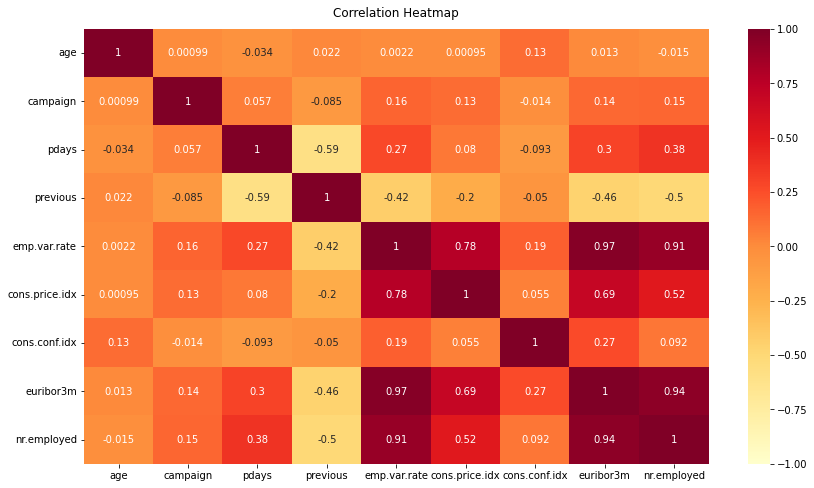

In [8]:
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True,cmap='YlOrRd')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [31]:
# delete some rows from threshold
corr = data.corr()

threshold = 0.3
df1 = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
result = []
for temp in df1:
  for t in df1:
    if corr[temp][t] >= threshold and corr[temp][t] < 0.9:
      result.append(temp)

result = list(set(result))
final = []
for temp in df1:
  if not temp in result:
    final.append(temp)

print(final)

data.drop(final, axis=1, inplace=True)
data.head()

['age', 'campaign', 'previous', 'cons.conf.idx']


,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999,nonexistent,1.1,93.994,4.857,5191.0,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,999,nonexistent,1.1,93.994,4.857,5191.0,no
2,services,married,high.school,no,yes,no,telephone,may,mon,999,nonexistent,1.1,93.994,4.857,5191.0,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,999,nonexistent,1.1,93.994,4.857,5191.0,no
4,services,married,high.school,no,no,yes,telephone,may,mon,999,nonexistent,1.1,93.994,4.857,5191.0,no


In [32]:
print(data['y'].value_counts() / len(data))

no     0.883311
yes    0.116689
Name: y, dtype: float64


In [33]:
px.bar(data['y'].value_counts(), template='ggplot2').show()

In [34]:
le = preprocessing.LabelEncoder()
data1 = data.apply(le.fit_transform)

In [35]:
data1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,3,1,0,0,0,0,1,6,1,26,1,8,18,287,8,0
1,7,1,3,1,0,0,1,6,1,26,1,8,18,287,8,0
2,7,1,3,0,2,0,1,6,1,26,1,8,18,287,8,0
3,0,1,1,0,0,0,1,6,1,26,1,8,18,287,8,0
4,7,1,3,0,0,2,1,6,1,26,1,8,18,287,8,0


In [41]:
X = data1.iloc[:,0:15]
y = data1.iloc[:,15]

X.shape, y.shape

((39404, 15), (39404,))

In [42]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

=====Confusion Matrix=====
[[8271  430]
 [ 813  337]]


=========Report==========
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      8701
           1       0.44      0.29      0.35      1150

    accuracy                           0.87      9851
   macro avg       0.67      0.62      0.64      9851
weighted avg       0.86      0.87      0.86      9851



ROC/AUC
0.6218119356595694


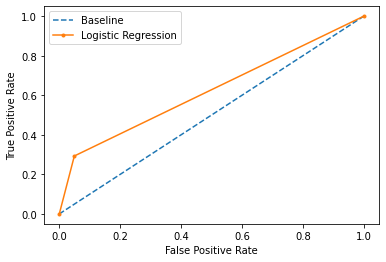

<class 'pandas.core.series.Series'>


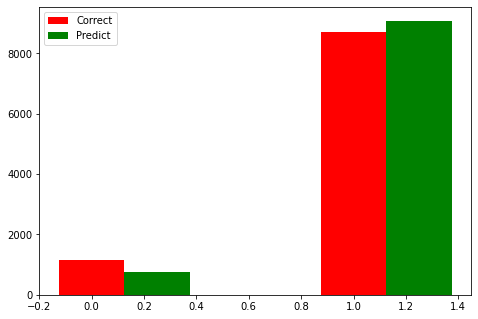

In [77]:
# Build the Classification model using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

# predict
y_pred = knn.predict(X_test)

# report
print("=====Confusion Matrix=====")
print(confusion_matrix(y_test, y_pred))
print("\n\n=========Report==========")
print(classification_report(y_test, y_pred))
print("\n\nROC/AUC")
print(roc_auc_score(y_test, y_pred))

# roc curve
class_pred = y_pred
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
fpr, tpr, _ = roc_curve(y_test, class_pred)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

true1 = 0
true0 = 0
false1 = 0
false0 = 0
y_list = y_test.tolist()

print(type(y_test))
for i in range(len(y_list)):
  if y_list[i] == 1:
    true1 += 1
  else:
    true0 += 1
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    false1 += 1
  else:
    false0 += 1

data = [[true1, true0],[false1, false0]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Correct', 'Predict'])

=====Confusion Matrix=====
[[8042  659]
 [ 805  345]]


=========Report==========
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      8701
           1       0.34      0.30      0.32      1150

    accuracy                           0.85      9851
   macro avg       0.63      0.61      0.62      9851
weighted avg       0.84      0.85      0.85      9851



ROC/AUC
0.6121307895644179


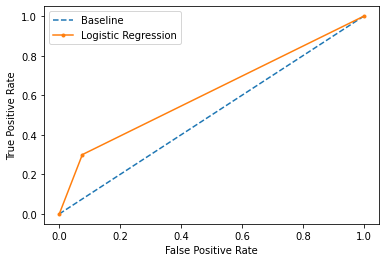

<class 'pandas.core.series.Series'>


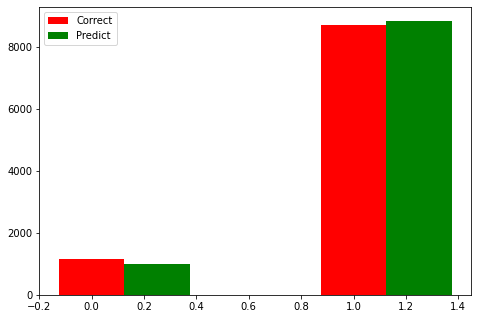

In [78]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# create model, training
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# report
print("=====Confusion Matrix=====")
print(confusion_matrix(y_test, y_pred))
print("\n\n=========Report==========")
print(classification_report(y_test, y_pred))
print("\n\nROC/AUC")
print(roc_auc_score(y_test, y_pred))

# roc curve
class_pred = y_pred
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
fpr, tpr, _ = roc_curve(y_test, class_pred)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# testing
true1 = 0
true0 = 0
false1 = 0
false0 = 0
y_list = y_test.tolist()

print(type(y_test))
for i in range(len(y_list)):
  if y_list[i] == 1:
    true1 += 1
  else:
    true0 += 1
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    false1 += 1
  else:
    false0 += 1

data = [[true1, true0],[false1, false0]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Correct', 'Predict'])

=====Confusion Matrix=====
[[8632   69]
 [ 957  193]]


=========Report==========
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8701
           1       0.74      0.17      0.27      1150

    accuracy                           0.90      9851
   macro avg       0.82      0.58      0.61      9851
weighted avg       0.88      0.90      0.87      9851



ROC/AUC
0.5799479819910756


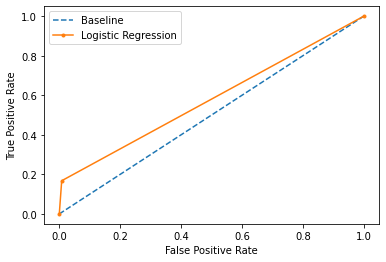

<class 'pandas.core.series.Series'>


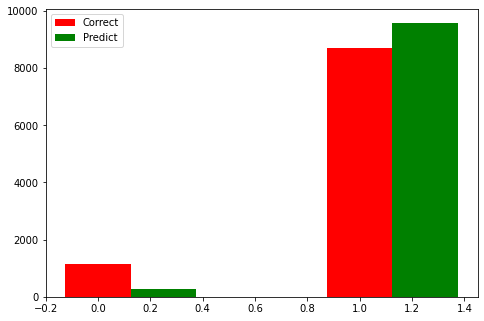

In [79]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create model, training
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf = rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# report
print("=====Confusion Matrix=====")
print(confusion_matrix(y_test, y_pred))
print("\n\n=========Report==========")
print(classification_report(y_test, y_pred))
print("\n\nROC/AUC")
print(roc_auc_score(y_test, y_pred))

# roc curve
class_pred = y_pred
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
fpr, tpr, _ = roc_curve(y_test, class_pred)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# testing
true1 = 0
true0 = 0
false1 = 0
false0 = 0
y_list = y_test.tolist()

print(type(y_test))
for i in range(len(y_list)):
  if y_list[i] == 1:
    true1 += 1
  else:
    true0 += 1
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    false1 += 1
  else:
    false0 += 1

data = [[true1, true0],[false1, false0]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Correct', 'Predict'])

=====Confusion Matrix=====
[[7718  983]
 [ 591  559]]


=========Report==========
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      8701
           1       0.36      0.49      0.42      1150

    accuracy                           0.84      9851
   macro avg       0.65      0.69      0.66      9851
weighted avg       0.86      0.84      0.85      9851



ROC/AUC
0.6865557182332864


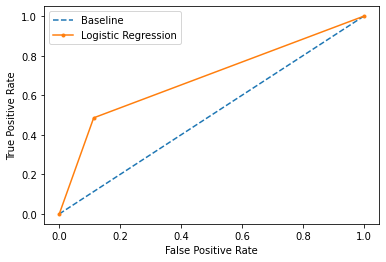

<class 'pandas.core.series.Series'>


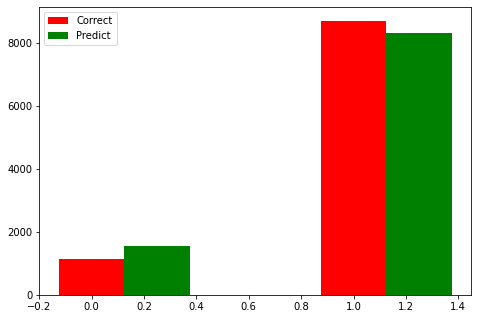

In [80]:
# Naive Baysian
from sklearn.naive_bayes import GaussianNB

# create model, training
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

# predict
y_pred = gnb.predict(X_test)

# report
print("=====Confusion Matrix=====")
print(confusion_matrix(y_test, y_pred))
print("\n\n=========Report==========")
print(classification_report(y_test, y_pred))
print("\n\nROC/AUC")
print(roc_auc_score(y_test, y_pred))

# roc curve
class_pred = y_pred
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
fpr, tpr, _ = roc_curve(y_test, class_pred)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# testing
true1 = 0
true0 = 0
false1 = 0
false0 = 0
y_list = y_test.tolist()

print(type(y_test))
for i in range(len(y_list)):
  if y_list[i] == 1:
    true1 += 1
  else:
    true0 += 1
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    false1 += 1
  else:
    false0 += 1

data = [[true1, true0],[false1, false0]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Correct', 'Predict'])

=====Confusion Matrix=====
[[8595  106]
 [ 918  232]]


=========Report==========
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8701
           1       0.69      0.20      0.31      1150

    accuracy                           0.90      9851
   macro avg       0.79      0.59      0.63      9851
weighted avg       0.88      0.90      0.87      9851



ROC/AUC
0.5947783113385269


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



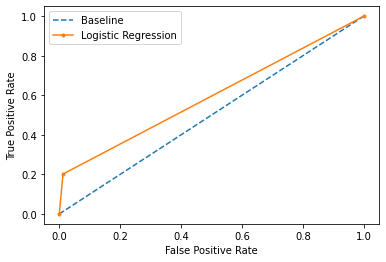

<class 'pandas.core.series.Series'>


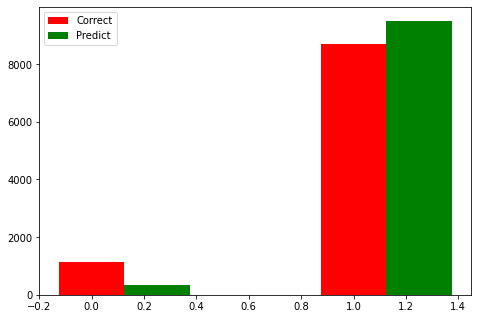

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# cretae model, training
lr = LogisticRegression(random_state=0)
lr = lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

# report
print("=====Confusion Matrix=====")
print(confusion_matrix(y_test, y_pred))
print("\n\n=========Report==========")
print(classification_report(y_test, y_pred))
print("\n\nROC/AUC")
print(roc_auc_score(y_test, y_pred))

# roc curve
class_pred = y_pred
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
fpr, tpr, _ = roc_curve(y_test, class_pred)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# testing
true1 = 0
true0 = 0
false1 = 0
false0 = 0
y_list = y_test.tolist()

print(type(y_test))
for i in range(len(y_list)):
  if y_list[i] == 1:
    true1 += 1
  else:
    true0 += 1
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    false1 += 1
  else:
    false0 += 1

data = [[true1, true0],[false1, false0]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Correct', 'Predict'])